<a href="https://colab.research.google.com/github/vladimir-dresevic/ml-product-reviews-project/blob/main/notebook/product_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📥 Loading and inspecting the dataset

Before diving into analysis, we first need to load the dataset and take a look at its structure.

In this step, we will:
- Load the CSV file from GitHub
- Check how many rows and columns we have
- Display the first few rows
- Review data types and basic metadata for each column

This will help us ensure the dataset is correctly loaded and ready for further exploration.


In [1]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/vladimir-dresevic/ml-product-reviews-project/main/data/product_reviews_full.csv"

df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()



Dataset shape (rows, columns): (171380, 6)

First 5 rows:


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


## 🔍 Checking for missing values

Missing data can cause problems during model training or analysis.  
Here, we will:
- Count the number of missing (NaN) values per column
- Visualize missing values using a heatmap

This will help us identify any columns that require cleaning or imputation.


In [2]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())


Missing values per column:
review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


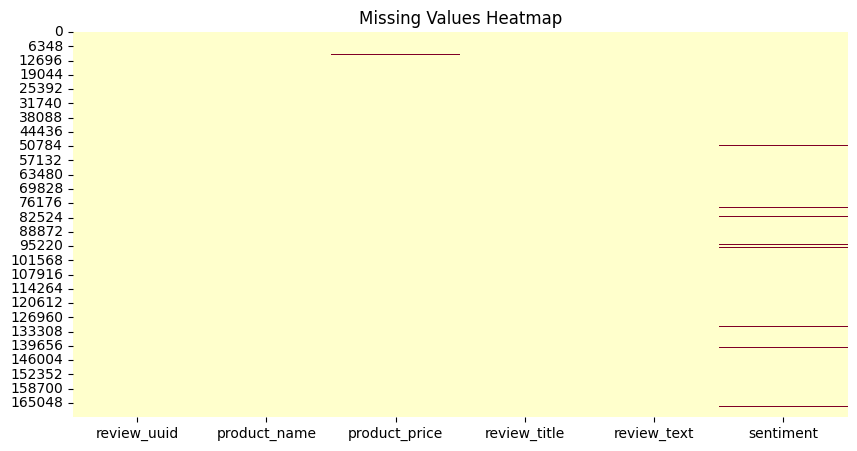

In [3]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()


## 📊 Sentiment analysis

Let's check how many reviews are labeled as positive vs negative vs neutral.

This helps us:
- Understand the balance between classes
- Detect if the dataset is skewed


In [4]:
# Count occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Print counts
print("Sentiment distribution (counts):")
print(sentiment_counts)


Sentiment distribution (counts):
sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


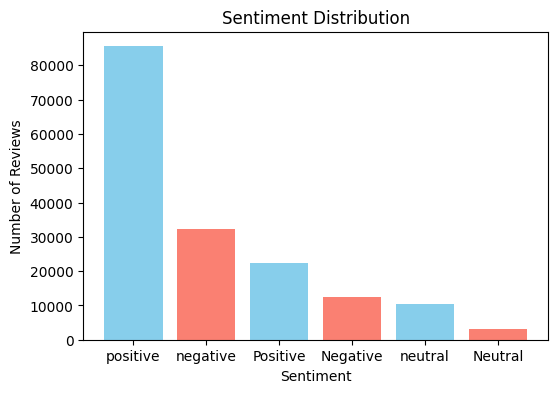

In [5]:
# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


## 💸 Exploring the `product_price` Column

Before we can use price data in any meaningful way, we need to understand how it is stored and formatted.

In this section, we will:
- Check the data type of the `product_price` column,
- Preview a few sample values,
- Identify the most common price entries,
- Detect non-numeric or problematic values such as `"Free"`, `"N/A"`, or corrupted symbols.

🛠 This is an important part of data cleaning. Even if a value *looks* like a number (e.g. `$48.19`), it may still be stored as a string and cause problems during numeric analysis or modeling.

Let's investigate what we’re working with!

In [6]:
# 1. Check the data type of the 'product_price' column
print("Data type of product_price column:", df['product_price'].dtype)

# 2. Display the first 10 values from the column
print("\nFirst 10 values in product_price column:")
print(df['product_price'].head(10))

# 3. Show the 20 most frequent values in the column
print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))

# 4. Check for known non-numeric text values
problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']
# Identify rows containing these specific non-numeric values
mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['product_price']].drop_duplicates())


# 5. Find and display some of the non-numeric values
price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))


Data type of product_price column: object

First 10 values in product_price column:
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,product_price


Number of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


## 🧹 Removing missing values

We already analyzed missing data in the previous step.  
Now we will simply drop all rows that contain missing values,  
and check the new shape and count missing values per column.


In [7]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())


New dataset shape: (165960, 6)
Missing values per column:
review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


## 💰 Parsing the `product_price` column

We noticed that some product prices are stored as numbers,  
while others contain a currency prefix like `"$"` (e.g. `"$48.18"` or `"$13190"`).

To make this column usable, we will:
- Remove the `"$"` text and any extra characters,
- Convert all values to numbers (`float`),
- Drop invalid rows if conversion fails.


In [8]:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)


# Step 2: Convert cleaned string to float
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors='coerce')

# Step 3: Drop the temporary column
df = df.drop(columns=['product_price_cleaned'])

# Step 4: Drop any rows where conversion failed (still NaN)
df = df.dropna(subset=['product_price'])

# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())






Column type after parsing: float64

Price summary:
count    165960.000000
mean         65.786896
std         135.944167
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


## ✅ Standardizing the `sentiment` column

The `sentiment` column should only contain `"positive"`, `"negative"` and `"neutral"` values.  
We will:
- Convert all values to lowercase,
- Convert column type to `'category'`
- Check results


In [9]:
# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()


# Step 2: Show all unique values in the sentiment column
print("Unique sentiment values after cleaning:")
print(df['sentiment'].value_counts())

# Step 3: Convert column type to 'category'
df['sentiment'] = df['sentiment'].astype('category')
print("\nSentiment column converted to type:", df['sentiment'].dtype)


Unique sentiment values after cleaning:
sentiment
positive    107619
negative     44663
neutral      13678
Name: count, dtype: int64

Sentiment column converted to type: category


## ✂️ Removing irrelevant columns

We will now remove columns that are not useful for model training:

- `review_uuid` – just a unique ID,
- `product_name` – too specific and inconsistent.

The key features we want to keep are:
- `review_title` – short description of whole review,
- `review_text` – the main input for sentiment prediction,
- `product_price` – to be analyzed further,
- `sentiment` – the target variable.


In [10]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['review_uuid', 'product_name'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['product_price', 'review_title', 'review_text', 'sentiment']


## 💸 Does product price affect sentiment?

Let's explore whether the price of a product has any influence on the sentiment of reviews.

We will:
- Look at summary statistics of product prices per sentiment,
- Visualize the price distribution grouped by sentiment.


Price summary by sentiment:
              count       mean         std   min   25%    50%     75%      max
sentiment                                                                     
negative    44663.0  59.655028  112.306009  0.71  4.35  18.06  60.710  1566.14
neutral     13678.0  55.532342  107.524238  0.71  3.30  10.23  59.845  1204.70
positive   107619.0  69.635003  147.485845  0.18  4.20  14.08  66.250  1048.07


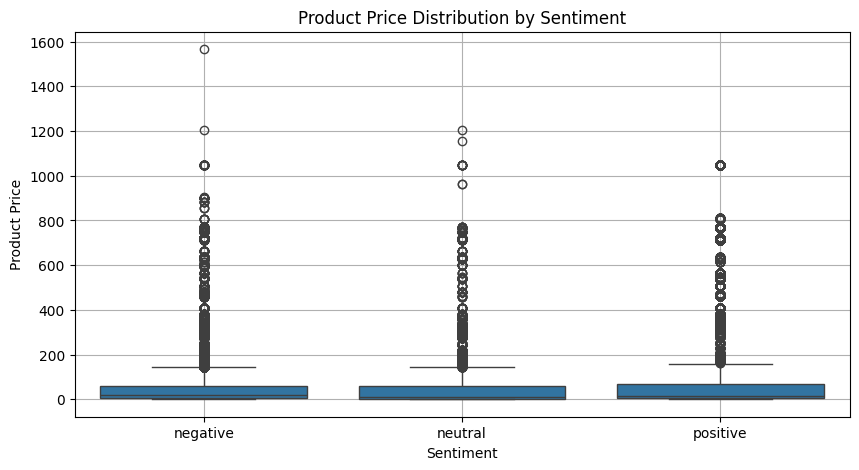

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show summary statistics grouped by sentiment
print("Price summary by sentiment:")
print(df.groupby('sentiment', observed=False)['product_price'].describe())

# Boxplot of prices by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='product_price')
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Product Price")
plt.grid(True)
plt.show()



## 🧮 Creating a new feature – review length

We will now create a new numeric feature called `review_length`  
that represents the number of characters in each review.

Then we'll visualize how review length varies across different sentiment categories.


Review length summary:
count    165960.000000
mean         48.378435
std          76.611087
min           1.000000
25%           9.000000
50%          19.000000
75%          50.000000
max         523.000000
Name: review_length, dtype: float64
Review length statistics by sentiment:
              count       mean        std  min   25%   50%   75%    max
sentiment                                                              
negative    44663.0  60.900701  78.376363  1.0  16.0  32.0  71.0  523.0
neutral     13678.0  41.418190  64.707990  1.0   7.0  19.0  47.0  500.0
positive   107619.0  44.066187  76.679684  1.0   8.0  15.0  41.0  497.0


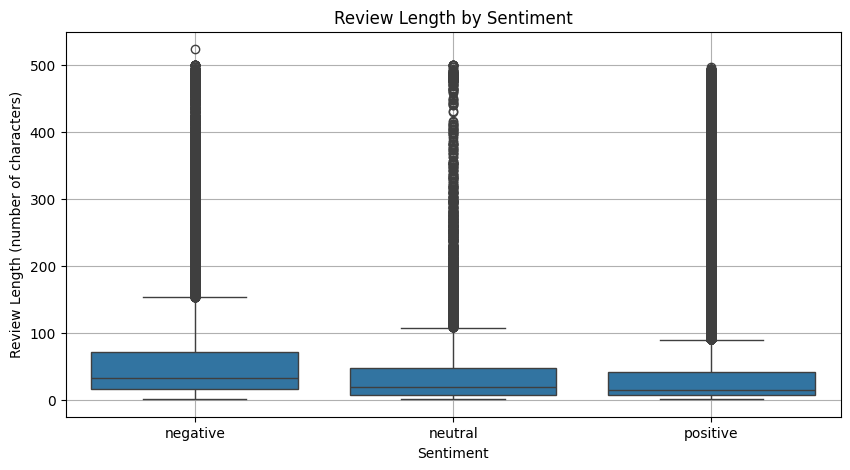

In [12]:
# Create new column with length of each review_text
df['review_length'] = df['review_text'].astype(str).str.len()

# Show basic stats
print("Review length summary:")
print(df['review_length'].describe())

# Group by sentiment and describe review length
print("Review length statistics by sentiment:")
print(df.groupby('sentiment', observed=False)['review_length'].describe())

# Visualize distribution of review length by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='review_length')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (number of characters)")
plt.grid(True)
plt.show()



### 📚 Training and Comparing Multiple Machine Learning Models

In this lesson, we will train and evaluate several different machine learning models in order to find the best one for our classification task.

We will go through the following steps:

🔹 Split the dataset into **training and test sets**,  
🔹 Prepare the data by:  
  - transforming the `review_title` and `review_text` columns using **TF-IDF**,  
  - scaling the `review_length` column using **MinMaxScaler**,  
🔹 Use a **ColumnTransformer** to combine all features into a single input matrix,  
🔹 Define and train **five different classification algorithms**,  
🔹 Wrap all components into a unified **Pipeline** for each model,  
🔹 Evaluate model performance using **classification reports**.

By the end of this lesson, you will be able to compare the strengths and weaknesses of different algorithms and select the most suitable one for your project.


In [13]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


# Features and label
X = df[["review_title", "review_text", "review_length"]]
y = df["sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessor: TF-IDF for text, MinMaxScaler for numeric feature
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "review_title"),
        ("text", TfidfVectorizer(), "review_text"),
        ("length", MinMaxScaler(), ["review_length"])
    ]
)

# List of classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

for name, model in models.items():
  print(f"\n🔍 {name}")
  pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
  ])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  print(classification_report(y_test, y_pred))




🔍 Logistic Regression
              precision    recall  f1-score   support

    negative       0.88      0.92      0.90      8932
     neutral       0.73      0.54      0.62      2736
    positive       0.96      0.97      0.97     21524

    accuracy                           0.92     33192
   macro avg       0.86      0.81      0.83     33192
weighted avg       0.92      0.92      0.92     33192


🔍 Naive Bayes
              precision    recall  f1-score   support

    negative       0.86      0.89      0.87      8932
     neutral       0.81      0.28      0.42      2736
    positive       0.92      0.98      0.95     21524

    accuracy                           0.90     33192
   macro avg       0.86      0.72      0.75     33192
weighted avg       0.89      0.90      0.88     33192


🔍 Decision Tree
              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      8932
     neutral       0.62      0.58      0.60      2736
    positive       0